In [34]:
import os

# Get the directory with the notebooks, including its subdirectories
current_dir = os.getcwd()

# Get the directories with data and results
data_dir = os.path.join(current_dir, "data")
temporary_dir= os.path.join(current_dir, "temporary_data")
results_dir = os.path.join(current_dir, "results")

project_dir = os.path.dirname(current_dir)

inputs_dir = os.path.join(project_dir, "inputs")

print(project_dir, current_dir, results_dir, data_dir, inputs_dir)

/home/xternava/Documents/GitHub/bloat-energy-consumption /home/xternava/Documents/GitHub/bloat-energy-consumption/notebooks /home/xternava/Documents/GitHub/bloat-energy-consumption/notebooks/results /home/xternava/Documents/GitHub/bloat-energy-consumption/notebooks/data /home/xternava/Documents/GitHub/bloat-energy-consumption/inputs


In [35]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "averagePSYS_with_std_all_repeats.csv")
df = pd.read_csv(data, delimiter=';')

# Filter the DataFrame to include only 'ToyBox' and 'GNU' rows
toybox_gnu_df = df[df['Utilities'].isin(['ToyBox', 'GNU'])]

# Pivot the DataFrame to have 'Utilities' as columns and 'PSYS' as values
pivot_df = toybox_gnu_df.pivot(index='Program', columns='Utilities', values='PSYS_avg')

# Calculate the percentage increase or decrease between 'ToyBox' and 'GNU'
pivot_df['Change'] = ((pivot_df['ToyBox'] - pivot_df['GNU']) / pivot_df['GNU']) * 100

# Round the percentage values to 2 decimal places
pivot_df['Change'] = pivot_df['Change'].round(2)

# Reset the index to include 'Program' as a column
pivot_df.reset_index(inplace=True)

output_data = os.path.join(results_dir, 'in_percentage_diffs_ToyBox.csv')
pivot_df.to_csv(output_data, index=False, sep=";")

# Display the result
print(pivot_df)


Utilities   Program           GNU        ToyBox    Change
0            base64  3.495048e+05  9.077979e+05    159.74
1          basename  2.940271e+05  2.926171e+05     -0.48
2               cat  2.125736e+06  1.517433e+09  71283.90
3             chmod  1.539669e+06  1.523403e+06     -1.06
4             cksum  1.139345e+07  2.062460e+08   1710.22
5              comm  5.506528e+07  3.383169e+08    514.39
6                cp  1.088484e+08  1.474435e+08     35.46
7               cut  2.207312e+06  1.139999e+07    416.46
8              date  3.153679e+05  3.153069e+05     -0.02
9           dirname  3.215384e+05  3.122429e+05     -2.89
10               du  5.232377e+05  5.185350e+05     -0.90
11             echo  3.214469e+05  3.108848e+05     -3.29
12           expand  7.273004e+06  5.023578e+05    -93.09
13           factor  3.219719e+05  3.161642e+05     -1.80
14            false  3.201407e+05  3.147483e+05     -1.68
15             head  3.200187e+05  3.148215e+05     -1.62
16            

In [53]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "averagePSYS_with_std_all_repeats.csv")
df = pd.read_csv(data, delimiter=';')

# Filter the DataFrame to include only 'ToyBox' and 'GNU' rows
toybox_gnu_df = df[df['Utilities'].isin(['ToyBox', 'GNU'])]

# Pivot the DataFrame to have 'Utilities' as columns and 'PSYS' as values
pivot_df = toybox_gnu_df.pivot(index='Program', columns='Utilities', values='PSYS_avg')

# Calculate the percentage increase or decrease between 'ToyBox' and 'GNU'
pivot_df['Change'] = ((pivot_df['ToyBox'] - pivot_df['GNU']) / pivot_df['GNU']) * 100

# Round the percentage values to 2 decimal places
pivot_df['Change'] = pivot_df['Change'].round(2)

# Reset the index to include 'Program' as a column
pivot_df.reset_index(inplace=True)

# Separate negative and positive percentages
negative_df = pivot_df[pivot_df['Change'] < 0]
positive_df = pivot_df[pivot_df['Change'] >= 0]

# Save to separate CSV files
output_data_negative = os.path.join(results_dir, 'negative_percentages_ToyBox.csv')
output_data_positive = os.path.join(results_dir, 'positive_percentages_ToyBox.csv')

negative_df.to_csv(output_data_negative, index=False, sep=";")
positive_df.to_csv(output_data_positive, index=False, sep=";")

# Display the results
print("Negative Percentages:")
print(negative_df)

print("\nPositive Percentages:")
print(positive_df)


Negative Percentages:
Utilities   Program           GNU        ToyBox  Change
1          basename  2.940271e+05  2.926171e+05   -0.48
3             chmod  1.539669e+06  1.523403e+06   -1.06
8              date  3.153679e+05  3.153069e+05   -0.02
9           dirname  3.215384e+05  3.122429e+05   -2.89
10               du  5.232377e+05  5.185350e+05   -0.90
11             echo  3.214469e+05  3.108848e+05   -3.29
12           expand  7.273004e+06  5.023578e+05  -93.09
13           factor  3.219719e+05  3.161642e+05   -1.80
14            false  3.201407e+05  3.147483e+05   -1.68
15             head  3.200187e+05  3.148215e+05   -1.62
16               id  3.279167e+05  3.132042e+05   -4.49
17             link  3.172843e+05  3.123558e+05   -1.55
19          logname  3.223869e+05  3.108298e+05   -3.58
22            mkdir  3.066123e+05  3.003350e+05   -2.05
23               mv  3.069390e+05  2.968988e+05   -3.27
25            touch  2.951958e+05  2.951806e+05   -0.01
26             true  2.947

In [63]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "averagePSYS_with_std_all_repeats.csv")
df = pd.read_csv(data, delimiter=';')

# Filter the DataFrame to include only 'ToyBox' and 'GNU' rows
toybox_gnu_df = df[df['Utilities'].isin(['BusyBox', 'GNU'])]

# Pivot the DataFrame to have 'Utilities' as columns and 'PSYS' as values
pivot_df = toybox_gnu_df.pivot(index='Program', columns='Utilities', values='PSYS_avg')

# Calculate the percentage increase or decrease between 'ToyBox' and 'GNU'
pivot_df['Change'] = ((pivot_df['BusyBox'] - pivot_df['GNU']) / pivot_df['GNU']) * 100

# Round the percentage values to 2 decimal places
pivot_df['Change'] = pivot_df['Change'].round(2)

# Reset the index to include 'Program' as a column
pivot_df.reset_index(inplace=True)

# Separate negative and positive percentages
negative_df = pivot_df[pivot_df['Change'] < 0]
positive_df = pivot_df[pivot_df['Change'] >= 0]

# Save to separate CSV files
output_data_negative = os.path.join(results_dir, 'negative_percentages_BusyBox.csv')
output_data_positive = os.path.join(results_dir, 'positive_percentages_BusyBox.csv')

negative_df.to_csv(output_data_negative, index=False, sep=";")
positive_df.to_csv(output_data_positive, index=False, sep=";")

# Display the results
print("Negative Percentages:")
print(negative_df)

print("\nPositive Percentages:")
print(positive_df)


Negative Percentages:
Utilities   Program      BusyBox           GNU  Change
1          basename    293712.65  2.940271e+05   -0.11
8              date    312215.25  3.153679e+05   -1.00
9           dirname    310088.40  3.215384e+05   -3.56
10               du    490593.25  5.232377e+05   -6.24
11             echo    305297.20  3.214469e+05   -5.02
13           factor    316259.00  3.219719e+05   -1.77
14            false    305318.35  3.201407e+05   -4.63
15             head    307939.85  3.200187e+05   -3.77
16               id    308193.30  3.279167e+05   -6.01
17             link    306343.65  3.172843e+05   -3.45
18               ln    305120.05  3.224753e+05   -5.38
19          logname    310082.15  3.223869e+05   -3.82
20               ls    898062.85  1.048413e+06  -14.34
22            mkdir    297652.60  3.066123e+05   -2.92
23               mv    295278.20  3.069390e+05   -3.80
25            touch    294509.05  2.951958e+05   -0.23
27               wc  87557206.75  4.546934e

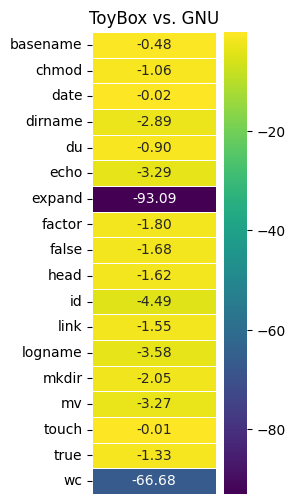

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "negative_percentages_ToyBox.csv")
df = pd.read_csv(data, delimiter=';')

# Remove 'GNU' and 'ToyBox' columns
df.drop(columns=['GNU', 'ToyBox'], inplace=True)

# Set the Program column as the index
df.set_index('Program', inplace=True)

# Create the cluster heatmap using seaborn
plt.figure(figsize=(2, 6))
ax = sns.heatmap(df, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('ToyBox vs. GNU')
plt.xlabel('')
plt.ylabel('')
ax.set_xticks([])
plt.show()

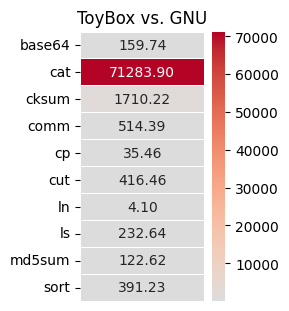

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "positive_percentages_ToyBox.csv")
df = pd.read_csv(data, delimiter=';')

# Remove 'GNU' and 'ToyBox' columns
df.drop(columns=['GNU', 'ToyBox'], inplace=True)

# Set the Program column as the index
df.set_index('Program', inplace=True)

# Create the cluster heatmap using seaborn
plt.figure(figsize=(2, 3.5))
ax = sns.heatmap(df, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('ToyBox vs. GNU')
plt.xlabel('')
plt.ylabel('')
ax.set_xticks([])
plt.show()

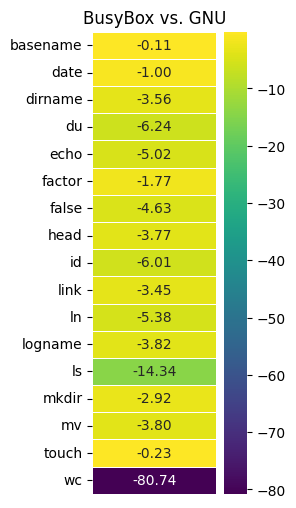

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "negative_percentages_BusyBox.csv")
df = pd.read_csv(data, delimiter=';')

# Remove 'GNU' and 'ToyBox' columns
df.drop(columns=['GNU', 'BusyBox'], inplace=True)

# Set the Program column as the index
df.set_index('Program', inplace=True)

# Create the cluster heatmap using seaborn
plt.figure(figsize=(2, 6))
ax = sns.heatmap(df, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('BusyBox vs. GNU')
plt.xlabel('')
plt.ylabel('')
ax.set_xticks([])
plt.show()

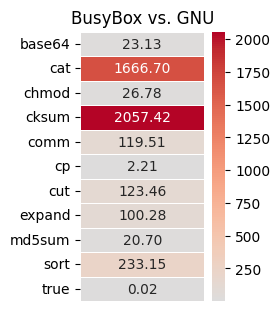

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = os.path.join(results_dir, "positive_percentages_BusyBox.csv")
df = pd.read_csv(data, delimiter=';')

# Remove 'GNU' and 'ToyBox' columns
df.drop(columns=['GNU', 'BusyBox'], inplace=True)

# Set the Program column as the index
df.set_index('Program', inplace=True)

# Create the cluster heatmap using seaborn
plt.figure(figsize=(2, 3.5))
ax = sns.heatmap(df, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('BusyBox vs. GNU')
plt.xlabel('')
plt.ylabel('')
ax.set_xticks([])
plt.show()

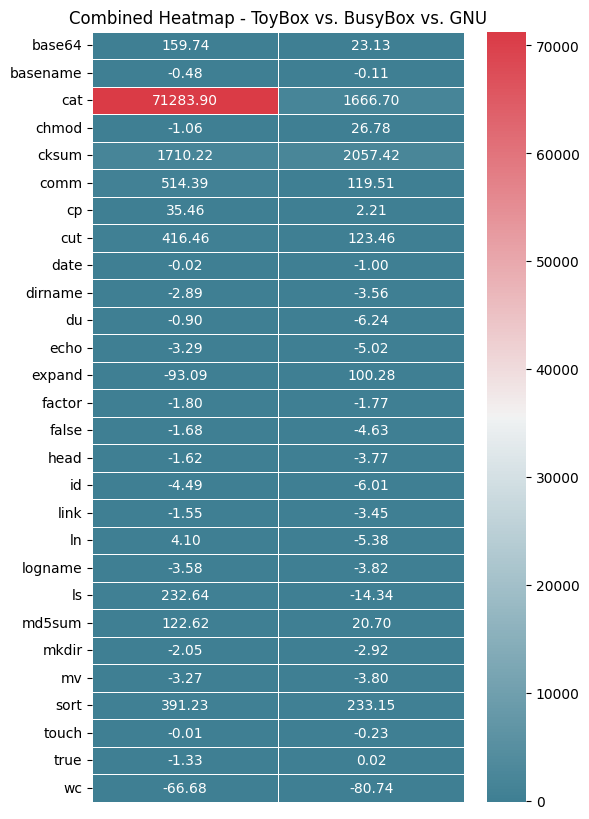

In [100]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read the CSV files into pandas DataFrames
data_files = [
    "negative_percentages_ToyBox.csv",
    "positive_percentages_ToyBox.csv",
    "negative_percentages_BusyBox.csv",
    "positive_percentages_BusyBox.csv"
]

df_list = []

for file in data_files:
    data_path = os.path.join(results_dir, file)
    df = pd.read_csv(data_path, delimiter=';', usecols=['Program', 'Change'])
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# Pivot the DataFrame to get "Program" as index and "Change" as values
pivot_df = combined_df.pivot_table(index='Program', columns=combined_df.groupby('Program').cumcount().add(1), values='Change')

# Create a custom colormap that maps negative values to the viridis palette and positive values to a neutral color
cmap = sns.diverging_palette(220, 10, as_cmap=True)
vmin = pivot_df.min().min()
vmax = pivot_df.max().max()

# Create the cluster heatmap using seaborn with custom cmap for positive and negative values
plt.figure(figsize=(6, 10))
ax = sns.heatmap(pivot_df, annot=True, cmap=cmap, vmin=vmin, vmax=vmax, fmt=".2f", linewidths=0.5)
plt.title('Combined Heatmap - ToyBox vs. BusyBox vs. GNU')
plt.xlabel('')
plt.ylabel('')
ax.set_xticks([])
plt.show()
